# Curso: MSI608 Tópicos avanzados en ciencia de datos
## Projecto: Análisis y Predición de clasificación GRD para Hospital El Pino

## Contexto
El sistema de Grupos Relacionados por el Diagnóstico (GRD) es una clasificación utilizada ampliamente en sistemas hospitalarios para agrupar pacientes con características clínicas y patrones similares. Cada GRD está compuesto por una combinación codificada que incluye una categoría diagnóstica principal (5 dígitos) y un índice de severidad (1 dígito) que va de 0 (sin severidad) a 3 (grave). Esta clasificación permite estandarizar el manejo clínico, facilitar la gestión hospitalaria y optimizar la asignación de recursos.

## Objetivo
El presente análisis busca predecir el GRD de un paciente al momento del ingreso hospitalario, utilizando como variables independientes el dataset que se nos entregó del Hospital El Pino (dataset_elpino.csv), donde las primeras 35 columnas del dataset corresponden al conjunto de diagnósticos y las siguientes 30 columnas a procedimientos médicos. Además contiene las variables sexo, edad y grd.

## Descripción de los datos

* Diag 01 Principal (cod+des): Este campo es el diagnostico principal, incluye código y descripción.

* Diag XX Secundario (cod+des): Hay 34 campos de diagnostico secundarios (XX = 02 ... 35), incluyen código y descripción.

* Proced 01 Principal (cod+des): Este campo es el procedimiento principal, incluye código y descripción.

* Proced XX Secundario (cod+des): Hay 29 campos de procediminetos secundarios (XX = 02 ... 30), incluyen código y descripción.

* Edad en años: Es campo contiene la edad del paciente en años.

* Sexo (Desc): Este campo contiene el sexo del paciende como descripción: Hombre/Mujer.

* GRD: Este campo contiene el código del diagnostico (5 dígitos) más la severidad (1 dígito) desde 1 a 3, siendo 1 leve y 3 grave.

In [1]:
!pip install keras_tuner

In [2]:
# Importamos librería básicas necesarias para el análisis de los datos

# Librerías para la manipulación de los datos
import pandas as pd
import numpy as np

# Librerías para visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# Remueve límite de número de columnas desplegadas
pd.set_option("display.max_columns", None)
# Configura límite de número de registros desplegados
#pd.set_option("display.max_rows", 200)

# Para la supreción de warnings
import warnings
warnings.filterwarnings("ignore")

# Para el dspliegue visual de los gráficos
%matplotlib inline

In [3]:
# Cargamos los datos, el delimitador es ';'
data = pd.read_csv("dataset_elpino.csv",delimiter=";")
# Copiamos los datos para su manipulación posterior
df = data.copy()
# Mostramos los primeros 5 registros del dataset
df.head()

,Diag 01 Principal (cod+des),Diag 02 Secundario (cod+des),Diag 03 Secundario (cod+des),Diag 04 Secundario (cod+des),Diag 05 Secundario (cod+des),Diag 06 Secundario (cod+des),Diag 07 Secundario (cod+des),Diag 08 Secundario (cod+des),Diag 09 Secundario (cod+des),Diag 10 Secundario (cod+des),Diag 11 Secundario (cod+des),Diag 12 Secundario (cod+des),Diag 13 Secundario (cod+des),Diag 14 Secundario (cod+des),Diag 15 Secundario (cod+des),Diag 16 Secundario (cod+des),Diag 17 Secundario (cod+des),Diag 18 Secundario (cod+des),Diag 19 Secundario (cod+des),Diag 20 Secundario (cod+des),Diag 21 Secundario (cod+des),Diag 22 Secundario (cod+des),Diag 23 Secundario (cod+des),Diag 24 Secundario (cod+des),Diag 25 Secundario (cod+des),Diag 26 Secundario (cod+des),Diag 27 Secundario (cod+des),Diag 28 Secundario (cod+des),Diag 29 Secundario (cod+des),Diag 30 Secundario (cod+des),Diag 31 Secundario (cod+des),Diag 32 Secundario (cod+des),Diag 33 Secundario (cod+des),Diag 34 Secundario (cod+des),Diag 35 Secundario (cod+des),Proced 01 Principal (cod+des),Proced 02 Secundario (cod+des),Proced 03 Secundario (cod+des),Proced 04 Secundario (cod+des),Proced 05 Secundario (cod+des),Proced 06 Secundario (cod+des),Proced 07 Secundario (cod+des),Proced 08 Secundario (cod+des),Proced 09 Secundario (cod+des),Proced 10 Secundario (cod+des),Proced 11 Secundario (cod+des),Proced 12 Secundario (cod+des),Proced 13 Secundario (cod+des),Proced 14 Secundario (cod+des),Proced 15 Secundario (cod+des),Proced 16 Secundario (cod+des),Proced 17 Secundario (cod+des),Proced 18 Secundario (cod+des),Proced 19 Secundario (cod+des),Proced 20 Secundario (cod+des),Proced 21 Secundario (cod+des),Proced 22 Secundario (cod+des),Proced 23 Secundario (cod+des),Proced 24 Secundario (cod+des),Proced 25 Secundario (cod+des),Proced 26 Secundario (cod+des),Proced 27 Secundario (cod+des),Proced 28 Secundario (cod+des),Proced 29 Secundario (cod+des),Proced 30 Secundario (cod+des),Edad en años,Sexo (Desc),GRD
0,A41.8 - Otras septicemias especificadas,B37.6 - Endocarditis debida a candida (I39.8*),"I39.8 - Endocarditis, válvula no especificada,...",N10 - Nefritis tubulointersticial aguda,B96.1 - Klebsiella pneumoniae [K. pneumoniae] ...,L89.9 - Úlcera de decúbito y area de presión n...,L08.9 - Infección local de la piel y del tejid...,B96.2 - Escherichia coli [E. coli] como causa ...,A41.5 - Sepsis por otros organnismos Gram nega...,J86.9 - Piotórax sin fístula,"U07.1 - COVID-19, virus identificado",Y95 - Afección nosocomial,"N18.5 - Enfermedad renal crónica, estadio 5",E87.1 - Hiposmolaridad e hiponatremia,D64.9 - Anemia de tipo no especificado,"G82.2 - Paraplejía, no especificada","N31.9 - Disfunción neuromuscular de la vejiga,...",I10 - Hipertensión esencial (primaria),K70.4 - Insuficiencia hepática alcohólica,F19.2 - Trastornos mentales y del comportamien...,F10.2 - Trastornos mentales y del comportamien...,"E46 - Desnutrición proteicocalórica, no especi...","G40.9 - Epilepsia, tipo no especificado","L21.9 - Dermatitis seborreica, no especificada",Z93.5 - Cistostomía,Z93.3 - Colostomía,Z99.2 - Dependencia de diálisis renal,Z91.6 - Historia personal de otro trauma físico,-,-,-,-,-,-,-,"86.28 - DESBRIDAMIENTO HERIDA,INFECCION O QUEM...",34.91 - TORACOCENTESIS,88.38 - TOMOGRAFIA AXIAL COMPUTERIZADA OTRA,87.41 - TOMOGRAFIA AXIAL COMPUTERIZADA TORAX,88.75 - ECOGRAFIA APARATO URINARIO,88.01 - TOMOGRAFIA AXIAL COMPUTERIZADA ABDOMEN,88.43 - ARTERIOGRAFIA ARTERIA PULMONAR,88.41 - ARTERIOGRAFIA ARTERIA CEREBRAL,87.44 - RADIOGRAFIA TORAX RUTINARIA,99.29 - INYECCION SUSTANCIA TERAPEUTICA O PROF...,99.19 - INYECCION ANTICOAGULANTE,99.18 - INYECCION ELECTROLITO,99.21 - INYECCION ANTIBIOTICO,99.26 - INYECCION TRANQUILIZANTE,99.23 - INYECCION ESTEROIDE,93.94 - AEROSOLTERAPIA,89.52 - ELECTROCARDIOGRAFIA,90.59 - EXAMEN MICROSCOPICO SANGRE.OTRO,89.65 - GASOMETRIA ARTERIA,39.95 - HEMODIALISIS,39.95 - HEMODIALISIS,99.04 - TRANSFUSION CONCENTRADO HEMATIES,90.39 - EXAMEN MICROSCOPICO ORL.OTRO,99.84 - AISLAMIENTO,88.7

In [4]:
# Para facilitar la manipulacion de la data, vamos a renombrar columnas con nombres simplificados
nuevo_nombre_columnas = {}
for col in df.columns:
    if "Diag" in col:
        # Extraer número (por ejemplo, "Diag 02 Secundario" es 02)
        num = ''.join(filter(str.isdigit, col.split()[1]))
        nuevo_nombre_columnas[col] = f"diag_{num.zfill(2)}"
    elif "Proced" in col:
        num = ''.join(filter(str.isdigit, col.split()[1]))
        nuevo_nombre_columnas[col] = f"proc_{num.zfill(2)}"
    elif "Edad" in col:
        nuevo_nombre_columnas[col] = "edad"
    elif "Sexo" in col:
        nuevo_nombre_columnas[col] = "sexo"
    elif col.strip() == "GRD":
        nuevo_nombre_columnas[col] = "grd"

# Aplicar el cambio de nombres
df.rename(columns=nuevo_nombre_columnas, inplace=True)

# Verificar resultado
print(df.columns.tolist())

['diag_01', 'diag_02', 'diag_03', 'diag_04', 'diag_05', 'diag_06', 'diag_07', 'diag_08', 'diag_09', 'diag_10', 'diag_11', 'diag_12', 'diag_13', 'diag_14', 'diag_15', 'diag_16', 'diag_17', 'diag_18', 'diag_19', 'diag_20', 'diag_21', 'diag_22', 'diag_23', 'diag_24', 'diag_25', 'diag_26', 'diag_27', 'diag_28', 'diag_29', 'diag_30', 'diag_31', 'diag_32', 'diag_33', 'diag_34', 'diag_35', 'proc_01', 'proc_02', 'proc_03', 'proc_04', 'proc_05', 'proc_06', 'proc_07', 'proc_08', 'proc_09', 'proc_10', 'proc_11', 'proc_12', 'proc_13', 'proc_14', 'proc_15', 'proc_16', 'proc_17', 'proc_18', 'proc_19', 'proc_20', 'proc_21', 'proc_22', 'proc_23', 'proc_24', 'proc_25', 'proc_26', 'proc_27', 'proc_28', 'proc_29', 'proc_30', 'edad', 'sexo', 'grd']


In [5]:
# Verificar shape
print(f"El dataset tiene {df.shape[0]} registros y {df.shape[1]} columnas \n")

# Muestra información de cada campo incluyendo tipo de dato
df.info()

El dataset tiene 14561 registros y 68 columnas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 68 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   diag_01  14561 non-null  object
 1   diag_02  14561 non-null  object
 2   diag_03  14561 non-null  object
 3   diag_04  14561 non-null  object
 4   diag_05  14561 non-null  object
 5   diag_06  14561 non-null  object
 6   diag_07  14561 non-null  object
 7   diag_08  14561 non-null  object
 8   diag_09  14561 non-null  object
 9   diag_10  14561 non-null  object
 10  diag_11  14561 non-null  object
 11  diag_12  14561 non-null  object
 12  diag_13  14561 non-null  object
 13  diag_14  14561 non-null  object
 14  diag_15  14561 non-null  object
 15  diag_16  14561 non-null  object
 16  diag_17  14561 non-null  object
 17  diag_18  14561 non-null  object
 18  diag_19  14561 non-null  object
 19  diag_20  14561 non-null  object
 20  diag_21  14561 non-null

In [6]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Total de valores nulos en el DataFrame
total_nulos = df.isnull().sum().sum()
print(f"\nTotal de valores nulos en el DataFrame: {total_nulos}")

Valores nulos por columna:
diag_01    0
diag_02    0
diag_03    0
diag_04    0
diag_05    0
          ..
proc_29    0
proc_30    0
edad       0
sexo       0
grd        0
Length: 68, dtype: int64

Total de valores nulos en el DataFrame: 0


In [7]:
# Veamos los valores faltantes por columna cuando no hay diagnostico o procedimiento, el cual tiene caracter: '-'

print((df == '-').sum())

diag_01        0
diag_02     1209
diag_03     2687
diag_04     4127
diag_05     5371
           ...  
proc_29    13379
proc_30    13498
edad           0
sexo           0
grd            0
Length: 68, dtype: int64


In [8]:
# Estadísticas descriptivas de todas las columnas
print("Estadísticas descriptivas:")
df.describe(include='all').T

Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
diag_01,14561,1491,O70.0 - Desgarro perineal de primer grado dura...,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diag_02,14561,1717,-,1209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diag_03,14561,1498,-,2687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diag_04,14561,1304,-,4127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diag_05,14561,1151,-,5371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
proc_29,14561,93,-,13379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proc_30,14561,92,-,13498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,14561.0,NaN,NaN,NaN,39.42655,24.681545,0.0,23.0,36.0,60.0,121.0
sexo,14561,2,Mujer,9617,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Verifica si hay filas duplicadas completas
duplicados = df.duplicated()

# Cantidad de duplicados
print(f"Cantidad de filas duplicadas: {duplicados.sum()}")

# Mostrar las filas duplicadas
df[duplicados]

Cantidad de filas duplicadas: 144


,diag_01,diag_02,diag_03,diag_04,diag_05,diag_06,diag_07,diag_08,diag_09,diag_10,diag_11,diag_12,diag_13,diag_14,diag_15,diag_16,diag_17,diag_18,diag_19,diag_20,diag_21,diag_22,diag_23,diag_24,diag_25,diag_26,diag_27,diag_28,diag_29,diag_30,diag_31,diag_32,diag_33,diag_34,diag_35,proc_01,proc_02,proc_03,proc_04,proc_05,proc_06,proc_07,proc_08,proc_09,proc_10,proc_11,proc_12,proc_13,proc_14,proc_15,proc_16,proc_17,proc_18,proc_19,proc_20,proc_21,proc_22,proc_23,proc_24,proc_25,proc_26,proc_27,proc_28,proc_29,proc_30,edad,sexo,grd
399,Z76.2 - Consulta para atención y supervisión d...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,89.7 - EXAMEN FISICO GENERAL,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,Hombre,"158171 - MH NEONATO, PESO AL NACER >2499 GR SI..."
502,Z76.2 - Consulta para atención y supervisión d...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,89.7 - EXAMEN FISICO GENERAL,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,Hombre,"158171 - MH NEONATO, PESO AL NACER >2499 GR SI..."
591,Z76.2 - Consulta para atención y supervisión d...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,89.7 - EXAMEN FISICO GENERAL,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,Hombre,"158171 - MH NEONATO, PESO AL NACER >2499 GR SI..."
606,P59.0 - Ictericia neonatal asociada con el par...,P07.3 - Otros recién nacidos pretérmino,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,99.83 - FOTOTERAPIA OTRA,89.7 - EXAMEN FISICO GENERAL,90.59 - EXAMEN MICROSCOPICO SANGRE.OTRO,93.82 - TERAPIA EDUCATIVA,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,Mujer,"158171 - MH NEONATO, PESO AL NACER >2499 GR SI..."
753,Z76.2 - Consulta para atención y supervisión d...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,89.7 - EXAMEN FISICO GENERAL,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,Mujer,"158171 - MH NEONATO, PESO AL NACER >2499 GR SI..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037,Z76.2 - Consulta para atención y supervisión d...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,89.7 - EXAMEN FISICO GENERAL,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,Mujer,"158171 - MH NEONATO, PESO AL NACER >2499 GR SI..."
14068,Z76.2 - Consulta para atención y supervisión d...,P07.3 - Otros recién nacidos pretérmino,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,89.7 - EXAMEN FISICO GENERAL,90.59 - EXAMEN MICROSCOPICO SANGRE.OTRO,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,Hombre,"158171 - MH NEONATO, PESO AL NACER >2499 GR SI..."
14212,"P59.9 - Ictericia neonatal, no especificada",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,99.83 - FOTOTERAPIA OTRA,89.7 - EXAMEN FISICO GENERAL,90.59 - EXAMEN MICROSCOPICO SANGRE.OTRO,93.82 - TERAPIA EDUCATIVA,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,Hombre,"158171 - MH NEONATO, PESO AL NACER >2499 GR SI..."
14249,P55.1 - Incompatibilidad ABO del feto y del re...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,99.83 - FOTOTERAPIA OTRA,90.59 - EXAMEN MICROSCOPICO SANGRE.OTRO,93.82 - TERAPIA EDUCATIVA,89.7 - EXAMEN FISICO GENERAL,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,Mujer,"158171 - MH NEONATO, PESO AL NACER >2499 GR SI..."


In [10]:
# Obtenemos duplicados con edad mayor a 0, porque puede tener mucho sentido duplicados para recién nacidos

# Filtramos solo filas con edad > 0
df_filtrado = df[df['edad'] > 0]

# Buscar duplicados
duplicados = df_filtrado[df_filtrado.duplicated(keep=False)]

# Mostrar resultado
print(f"Se encontraron {duplicados.shape[0]} filas duplicadas con edad > 0.")
duplicados

Se encontraron 12 filas duplicadas con edad > 0.


,diag_01,diag_02,diag_03,diag_04,diag_05,diag_06,diag_07,diag_08,diag_09,diag_10,diag_11,diag_12,diag_13,diag_14,diag_15,diag_16,diag_17,diag_18,diag_19,diag_20,diag_21,diag_22,diag_23,diag_24,diag_25,diag_26,diag_27,diag_28,diag_29,diag_30,diag_31,diag_32,diag_33,diag_34,diag_35,proc_01,proc_02,proc_03,proc_04,proc_05,proc_06,proc_07,proc_08,proc_09,proc_10,proc_11,proc_12,proc_13,proc_14,proc_15,proc_16,proc_17,proc_18,proc_19,proc_20,proc_21,proc_22,proc_23,proc_24,proc_25,proc_26,proc_27,proc_28,proc_29,proc_30,edad,sexo,grd
1476,O34.2 - Atención materna por cicatriz uterina ...,O82.0 - Parto por cesárea electiva,"Z37.0 - Nacido vivo, único","Z38.0 - Producto único, nacido en hospital",Z39.0 - Atención y examen inmediatamente despu...,Z39.1 - Atención y examen de madre en período ...,"Z39.2 - Seguimiento postparto, de rutina",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,74.1 - CESAREA CERVICAL BAJA,75.34 - MONITORIZACION FETO OTRA,89.7 - EXAMEN FISICO GENERAL,89.26 - EXAMEN GINECOLOGICO,90.59 - EXAMEN MICROSCOPICO SANGRE.OTRO,57.94 - SONDAJE URINARIO PERMANENTE,99.18 - INYECCION ELECTROLITO,99.29 - INYECCION SUSTANCIA TERAPEUTICA O PROF...,99.33 - VACUNACION TUBERCULOSIS,99.24 - INYECCION HORMONA OTRA,97.64 - EXTRACCION DISPOSITIVO DRENAJE URINARI...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,25,Mujer,146101 - PH CESÁREA
4576,O70.0 - Desgarro perineal de primer grado dura...,"O80.0 - Parto único espontáneo, presentación c...","Z37.0 - Nacido vivo, único","Z38.0 - Producto único, nacido en hospital",Z39.0 - Atención y examen inmediatamente despu...,Z39.1 - Atención y examen de madre en período ...,"Z39.2 - Seguimiento postparto, de rutina",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,73.59 - PARTO ASISTIDO MANUALMENTE.OTRO,75.69 - REPARACION DESGARRO OBSTETRICO ACTUAL ...,73.09 - ROTURA ARTIFICIAL MEMBRANA.OTRA,03.90 - INSERCION CATETER PARA INFUSION TERAPE...,03.91 - INYECCION ANESTESICO CANAL ESPINAL PAR...,75.34 - MONITORIZACION FETO OTRA,99.24 - INYECCION HORMONA OTRA,99.18 - INYECCION ELECTROLITO,90.39 - EXAMEN MICROSCOPICO ORL.OTRO,90.59 - EXAMEN MICROSCOPICO SANGRE.OTRO,89.26 - EXAMEN GINECOLOGICO,89.7 - EXAMEN FISICO GENERAL,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,34,Mujer,"146121 - PH PARTO VAGINAL CON PROCED., EXCEPTO..."
4646,O70.0 - Desgarro perineal de primer grado dura...,"O80.0 - Parto único espontáneo, presentación c...","Z37.0 - Nacido vivo, único","Z38.0 - Producto único, nacido en hospital",Z39.0 - Atención y examen inmediatamente despu...,Z39.1 - Atención y examen de madre en período ...,"Z39.2 - Seguimiento postparto, de rutina",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,73.59 - PARTO ASISTIDO MANUALMENTE.OTRO,75.69 - REPARACION DESGARRO OBSTETRICO ACTUAL ...,03.31 - PUNCION LUMBAR,03.91 - INYECCION ANESTESICO CANAL ESPINAL PAR...,75.34 - MONITORIZACION FETO OTRA,68.11 - EXPLORACION DIGITAL UTERO,89.7 - EXAMEN FISICO GENERAL,89.26 - EXAMEN GINECOLOGICO,90.59 - EXAMEN MICROSCOPICO SANGRE.OTRO,99.18 - INYECCION ELECTROLITO,99.29 - INYECCION SUSTANCIA TERAPEUTICA O PROF...,99.24 - INYECCION HORMONA OTRA,99.33 - VACUNACION TUBERCULOSIS,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,23,Mujer,"146121 - PH PARTO VAGINAL CON PROCED., EXCEPTO..."
5161,O70.0 - Desgarro perineal de primer grado dura...,"O80.0 - Parto único espontáneo, presentación c...","Z37.0 - Nacido vivo, único","Z38.0 - Producto único, nacido en hospital",Z39.0 - Atención y examen inmediatamente despu...,Z39.1 - Atención y examen de madre en período ...,"Z39.2 - Seguimiento postparto, de rutina",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,73.59 - PARTO ASISTIDO MANUALMENTE.OTRO,75.69 - REPARACION DESGARRO OBSTETRICO ACTUAL ...,73.09 - ROTURA ARTIFICIAL MEMBRANA.OTRA,03.90 - INSERCION CATETER PARA INFUSION TERAPE...,03.91 - INYECCION ANESTESICO CANAL ESPINAL PAR...,75.34 - MONITORIZACION FETO OTRA,99.24 - INYECCION HORMONA OTRA,99.18 - INYECCION ELECTROLITO,90.39 - EXAMEN MICROSCOPICO ORL.OTRO,90.59 - EXAMEN MICROSCOPIC

Ahora comenzamos un Análisis Exploratorio de los datos

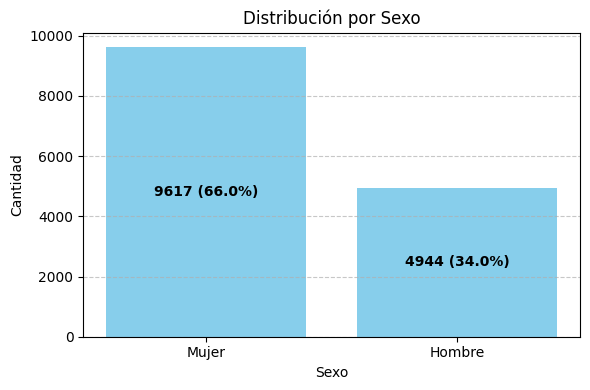

In [11]:
# Conteo y porcentaje
sexo_counts = df['sexo'].value_counts()
total = sexo_counts.sum()
porcentajes = (sexo_counts / total * 100).round(1)

# Gráfico de barras
plt.figure(figsize=(6, 4))
bars = plt.bar(sexo_counts.index.astype(str), sexo_counts.values, color='skyblue')

# Etiquetas y títulos
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valor y porcentaje dentro de cada barra
for bar, valor, porcentaje in zip(bars, sexo_counts.values, porcentajes):
    altura = bar.get_height()
    texto = f'{valor} ({porcentaje}%)'
    plt.text(bar.get_x() + bar.get_width() / 2, altura * 0.5, texto,
             ha='center', va='center', color='black', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


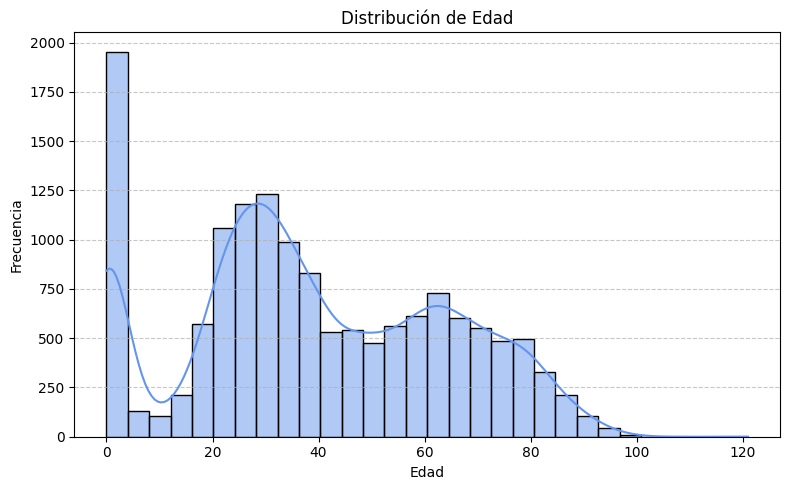

In [12]:
# Distribución de las edades
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='edad', kde=True, color='cornflowerblue', bins=30)

plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
# Diagnóstico principal más frecuentes
print("Diagnósticos principales más comunes:")
print(df['diag_01'].value_counts().head(10))

Diagnósticos principales más comunes:
diag_01
O70.0 - Desgarro perineal de primer grado durante el parto                       779
O80.0 - Parto único espontáneo, presentación cefálica de vértice                 471
U07.1 - COVID-19, virus identificado                                             327
O34.2 - Atención materna por cicatriz uterina debida a cirugía previa            304
E11.5 - Diabetes mellitus tipo 2 con complicaciones circulatorias periféricas    215
K35.8 - Apendicitis aguda, otra y no especificada                                208
N10 - Nefritis tubulointersticial aguda                                          189
K80.2 - Cálculo de la vesícula biliar sin colecistitis                           184
N39.0 - Infección de vías urinarias, sitio no especificado                       180
I63.8 - Otros infartos cerebrales                                                166
Name: count, dtype: int64


In [14]:
# Procedimiento principal más frecuentes
print("Procedimientos principales más comunes:")
print(df['proc_01'].value_counts().head(10))

Procedimientos principales más comunes:
proc_01
73.59 - PARTO ASISTIDO MANUALMENTE.OTRO                 1648
74.1 - CESAREA CERVICAL BAJA                            1214
87.03 - TOMOGRAFIA AXIAL COMPUTERIZADA CABEZA            981
87.44 - RADIOGRAFIA TORAX RUTINARIA                      949
87.41 - TOMOGRAFIA AXIAL COMPUTERIZADA TORAX             738
88.01 - TOMOGRAFIA AXIAL COMPUTERIZADA ABDOMEN           533
89.7 - EXAMEN FISICO GENERAL                             492
51.23 - COLECISTECTOMIA LAPAROSCOPICA                    482
88.78 - ECOGRAFIA UTERO GRAVIDO                          329
93.90 - RESPIRACION PRESION POSITIVA CONTINUA [RPPC]     286
Name: count, dtype: int64


In [15]:
# GRDs más frecuentes
print("GRD más comunes:")
print(df['grd'].value_counts().head(10))

GRD más comunes:
grd
146101 - PH CESÁREA                                                                       813
146121 - PH PARTO VAGINAL CON PROCED., EXCEPTO ESTERILIZACIÓN Y/O DILATACIÓN Y LEGRADO    639
146131 - PH PARTO VAGINAL                                                                 538
158171 - MH NEONATO, PESO AL NACER >2499 GR SIN PROCEDIMIENTO MAYOR                       389
134161 - MH TRASTORNOS DEL ANTEPARTO                                                      325
071141 - PH COLECISTECTOMÍA LAPAROSCÓPICA                                                 317
044153 - MH INFECCIONES E INFLAMACIONES RESPIRATORIAS W/MCC                               287
061131 - PH PROCEDIMIENTOS SOBRE APÉNDICE                                                 252
041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUEOSTOMÍA W/MCC                       248
146102 - PH CESÁREA W/CC                                                                  244
Name: count, dtype: int64


In [16]:
# Dado que los diagnósticos, procedimientos y grd se componen de código + descripción,
# vamos a separar ambos y así seguir trabajando de manera más simple solo con los códigos

import re

# copiamos a df2 para que esta manipulación de datos sea repetible sobre los datos anteriores
df2 = df.copy()

columnas_nuevas = []

for col in df2.columns:
    if re.match(r'diag_\d{2}$', col) or re.match(r'proc_\d{2}$', col) or col == 'grd':
        # Separar en dos columnas: cod y desc
        cod_desc = df2[col].str.split(' - ', n=1, expand=True)
        cod_col = f"{col}_cod"
        desc_col = f"{col}_desc"
        cod_desc.columns = [cod_col, desc_col]
        columnas_nuevas.append(cod_desc)

# Concatenar todas las nuevas columnas de una sola vez
df2 = pd.concat([df2] + columnas_nuevas, axis=1)

# Verificar
print("Columnas después de dividir código y descripción:")
print(df2.columns[df2.columns.str.contains('_cod|_desc')].tolist())

# Ahora nos quedamos solamentes con las columnas que terminan en '_cod' más las columnas 'sexo' y 'edad'
columnas_cod = [col for col in df2.columns if col.endswith('_cod')]
columnas_extra = ['sexo', 'edad']

# seleccionamos solo las columnas deseadas
df2 = df2[columnas_cod + columnas_extra]

# Mapear sexo: Mujer → 0, Hombre → 1
df2['sexo'] = df2.loc[df2.index, 'sexo'].map({'Mujer': 0, 'Hombre': 1})

# Mostrar resultado
df2.head()

Columnas después de dividir código y descripción:
['diag_01_cod', 'diag_01_desc', 'diag_02_cod', 'diag_02_desc', 'diag_03_cod', 'diag_03_desc', 'diag_04_cod', 'diag_04_desc', 'diag_05_cod', 'diag_05_desc', 'diag_06_cod', 'diag_06_desc', 'diag_07_cod', 'diag_07_desc', 'diag_08_cod', 'diag_08_desc', 'diag_09_cod', 'diag_09_desc', 'diag_10_cod', 'diag_10_desc', 'diag_11_cod', 'diag_11_desc', 'diag_12_cod', 'diag_12_desc', 'diag_13_cod', 'diag_13_desc', 'diag_14_cod', 'diag_14_desc', 'diag_15_cod', 'diag_15_desc', 'diag_16_cod', 'diag_16_desc', 'diag_17_cod', 'diag_17_desc', 'diag_18_cod', 'diag_18_desc', 'diag_19_cod', 'diag_19_desc', 'diag_20_cod', 'diag_20_desc', 'diag_21_cod', 'diag_21_desc', 'diag_22_cod', 'diag_22_desc', 'diag_23_cod', 'diag_23_desc', 'diag_24_cod', 'diag_24_desc', 'diag_25_cod', 'diag_25_desc', 'diag_26_cod', 'diag_26_desc', 'diag_27_cod', 'diag_27_desc', 'diag_28_cod', 'diag_28_desc', 'diag_29_cod', 'diag_29_desc', 'diag_30_cod', 'diag_30_desc', 'diag_31_cod', 'dia

,diag_01_cod,diag_02_cod,diag_03_cod,diag_04_cod,diag_05_cod,diag_06_cod,diag_07_cod,diag_08_cod,diag_09_cod,diag_10_cod,diag_11_cod,diag_12_cod,diag_13_cod,diag_14_cod,diag_15_cod,diag_16_cod,diag_17_cod,diag_18_cod,diag_19_cod,diag_20_cod,diag_21_cod,diag_22_cod,diag_23_cod,diag_24_cod,diag_25_cod,diag_26_cod,diag_27_cod,diag_28_cod,diag_29_cod,diag_30_cod,diag_31_cod,diag_32_cod,diag_33_cod,diag_34_cod,diag_35_cod,proc_01_cod,proc_02_cod,proc_03_cod,proc_04_cod,proc_05_cod,proc_06_cod,proc_07_cod,proc_08_cod,proc_09_cod,proc_10_cod,proc_11_cod,proc_12_cod,proc_13_cod,proc_14_cod,proc_15_cod,proc_16_cod,proc_17_cod,proc_18_cod,proc_19_cod,proc_20_cod,proc_21_cod,proc_22_cod,proc_23_cod,proc_24_cod,proc_25_cod,proc_26_cod,proc_27_cod,proc_28_cod,proc_29_cod,proc_30_cod,grd_cod,sexo,edad
0,A41.8,B37.6,I39.8,N10,B96.1,L89.9,L08.9,B96.2,A41.5,J86.9,U07.1,Y95,N18.5,E87.1,D64.9,G82.2,N31.9,I10,K70.4,F19.2,F10.2,E46,G40.9,L21.9,Z93.5,Z93.3,Z99.2,Z91.6,-,-,-,-,-,-,-,86.28,34.91,88.38,87.41,88.75,88.01,88.43,88.41,87.44,99.29,99.19,99.18,99.21,99.26,99.23,93.94,89.52,90.59,89.65,39.95,39.95,99.04,90.39,99.84,88.72,90.42,90.52,91.39,91.33,87.03,184103,1,40
1,U07.1,J12.8,R06.0,R05,R50.9,Z29.0,Z01.7,J96.00,J94.2,J92.9,J15.1,Y95,N17.9,G62.8,M54.19,L89.3,F13.2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,31.1,86.28,96.72,93.90,89.7,88.01,87.41,34.04,88.43,93.96,93.94,90.39,99.84,99.29,99.19,00.17,99.21,99.18,99.26,99.23,89.65,91.69,87.44,91.62,90.43,91.39,90.52,91.32,96.59,90.99,041013,1,53
2,K56.5,R57.2,R57.1,J80,Y95,J15.0,U82.2,B95.6,B96.8,B37.1,J99.8,J69.0,A49.0,L89.3,B96.4,E11.1,E87.0,E87.6,E83.5,N17.9,K75.9,D64.9,E46,E87.3,J44.8,J98.4,U07.1,Z29.0,Z01.7,Z20.8,Z88.0,Z72.0,-,-,-,86.22,54.59,96.72,31.1,45.13,87.41,87.03,88.01,88.43,88.72,33.22,87.44,89.7,90.59,00.17,99.21,99.04,93.96,91.83,90.43,38.93,91.33,90.39,99.84,91.73,90.53,99.26,89.39,89.66,89.65,041013,1,65
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,K44.9,K26.9,B96.2,R57.1,K80.2,L89.0,F12.2,Z91.1,Z99.2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,54.19,39.98,86.28,54.62,96.72,96.04,87.41,88.01,88.38,88.41,88.47,87.44,88.75,88.79,88.72,89.52,45.13,38.93,38.91,38.95,39.95,96.59,94.19,57.94,00.13,00.17,99.04,99.18,99.21,99.23,041023,1,61
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,B96.2,Y95,D62,N17.9,E87.6,K70.4,I85.9,G93.4,R18,I10,F10.2,F19.2,-,-,-,-,-,-,-,-,-,-,-,-,-,54.11,45.90,46.73,46.20,86.28,54.19,89.7,96.04,96.72,54.4,88.47,88.01,87.44,99.04,93.94,93.96,00.13,00.17,99.18,99.26,99.19,99.21,99.29,90.52,91.39,91.32,93.90,99.15,96.59,45.13,041023,1,30


In [17]:
# Ahora separamos el último digito que significa la severidad

# copiamos a d3 para que esta manipulación de datos sea repetible sobre los datos anteriores
df3 = df2.copy()

# Asegurar que 'grd_cod' es string
df3.loc[:, 'grd_cod'] = df3['grd_cod'].astype(str)

# Crear las nuevas columnas de forma segura
df3.loc[:, 'grd_base'] = df3['grd_cod'].str[:-1]
df3.loc[:, 'grd_nivel'] = df3['grd_cod'].str[-1].astype(int)

# Verificar
print(df3[['grd_cod', 'grd_base', 'grd_nivel']].head(10))

  grd_cod grd_base  grd_nivel
0  184103    18410          3
1  041013    04101          3
2  041013    04101          3
3  041023    04102          3
4  041023    04102          3
5  041013    04101          3
6  041013    04101          3
7  041013    04101          3
8  041023    04102          3
9  041023    04102          3


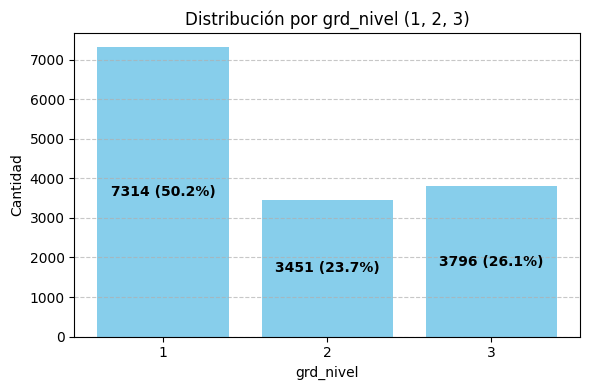

In [18]:
# Orden explícito de los niveles
orden_niveles = [1, 2, 3]

# Conteo y porcentaje, asegurando orden
grd_nivel_counts = df3['grd_nivel'].value_counts().reindex(orden_niveles, fill_value=0)
total = grd_nivel_counts.sum()
porcentajes = (grd_nivel_counts / total * 100).round(1)

# Gráfico de barras
plt.figure(figsize=(6, 4))
bars = plt.bar(grd_nivel_counts.index.astype(str), grd_nivel_counts.values, color='skyblue')

# Etiquetas y títulos
plt.title('Distribución por grd_nivel (1, 2, 3)')
plt.xlabel('grd_nivel')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valor y porcentaje dentro de cada barra
for bar, valor, porcentaje in zip(bars, grd_nivel_counts.values, porcentajes):
    altura = bar.get_height()
    texto = f'{valor} ({porcentaje}%)'
    plt.text(bar.get_x() + bar.get_width() / 2, altura * 0.5, texto,
             ha='center', va='center', color='black', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


Top 10 GRD base más frecuentes:
grd_base
14610    1220
14612     927
14613     741
07114     501
13416     458
15817     433
11412     357
04415     341
06120     332
06113     326
Name: count, dtype: int64


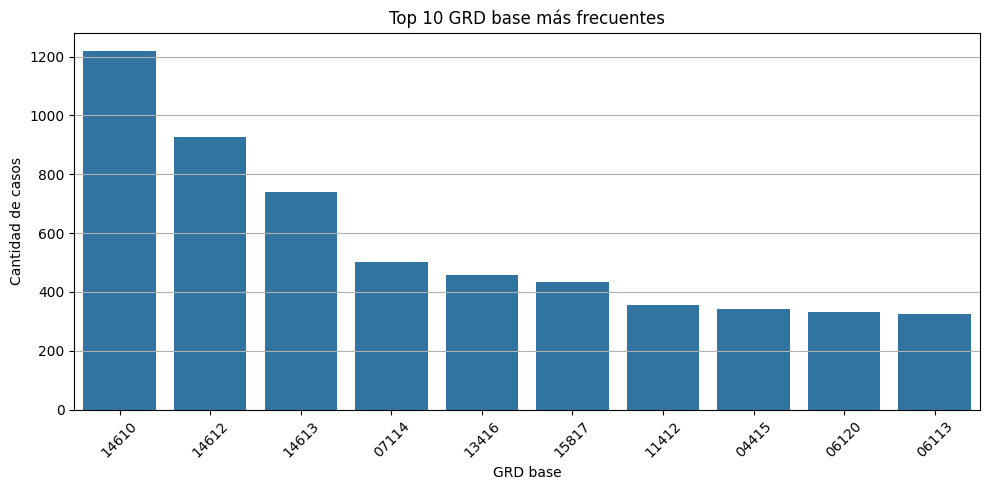

In [19]:
# Conteo de GRD base
conteo_base = df3['grd_base'].value_counts().head(10)

# Mostrar en texto
print("Top 10 GRD base más frecuentes:")
print(conteo_base)

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_base.index, y=conteo_base.values)
plt.title("Top 10 GRD base más frecuentes")
plt.xlabel("GRD base")
plt.ylabel("Cantidad de casos")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
conteo_distintos = df3['grd_base'].nunique()
print(f"Cantidad total de GRD base distintos: {conteo_distintos}")

# Contar cuántas veces aparece cada valor de grd_cod
conteo = df3['grd_cod'].value_counts()

# Filtrar aquellos que aparecen solo una vez
solo_uno = conteo[conteo == 1]

# Mostrar cuántos hay
print(f"Número de grd_cod únicos que aparecen solo una vez: {len(solo_uno)}")

Cantidad total de GRD base distintos: 210
Número de grd_cod únicos que aparecen solo una vez: 76


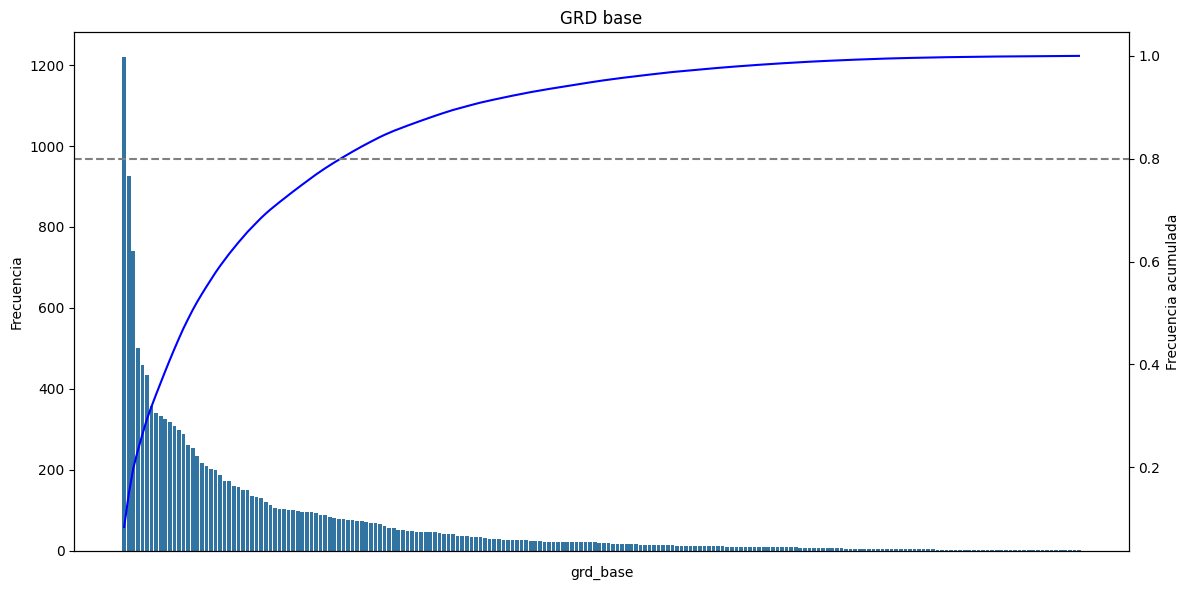

In [21]:
# Mostramos gráfico de frecuencia con función de frecuencia acumulada para los grd base
conteo = df3['grd_base'].value_counts()
cumsum = conteo.cumsum() / conteo.sum()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras
sns.barplot(x=conteo.index, y=conteo.values, ax=ax1)
ax1.set_ylabel('Frecuencia')

# Ocultar etiquetas del eje X
ax1.set_xticklabels([])
ax1.tick_params(axis='x', which='both', bottom=False)

# Línea acumulada en segundo eje
ax2 = ax1.twinx()
ax2.plot(conteo.index, cumsum, color='blue')
ax2.axhline(0.8, color='gray', linestyle='--')
ax2.set_ylabel('Frecuencia acumulada')

plt.title("GRD base")
plt.tight_layout()
plt.show()


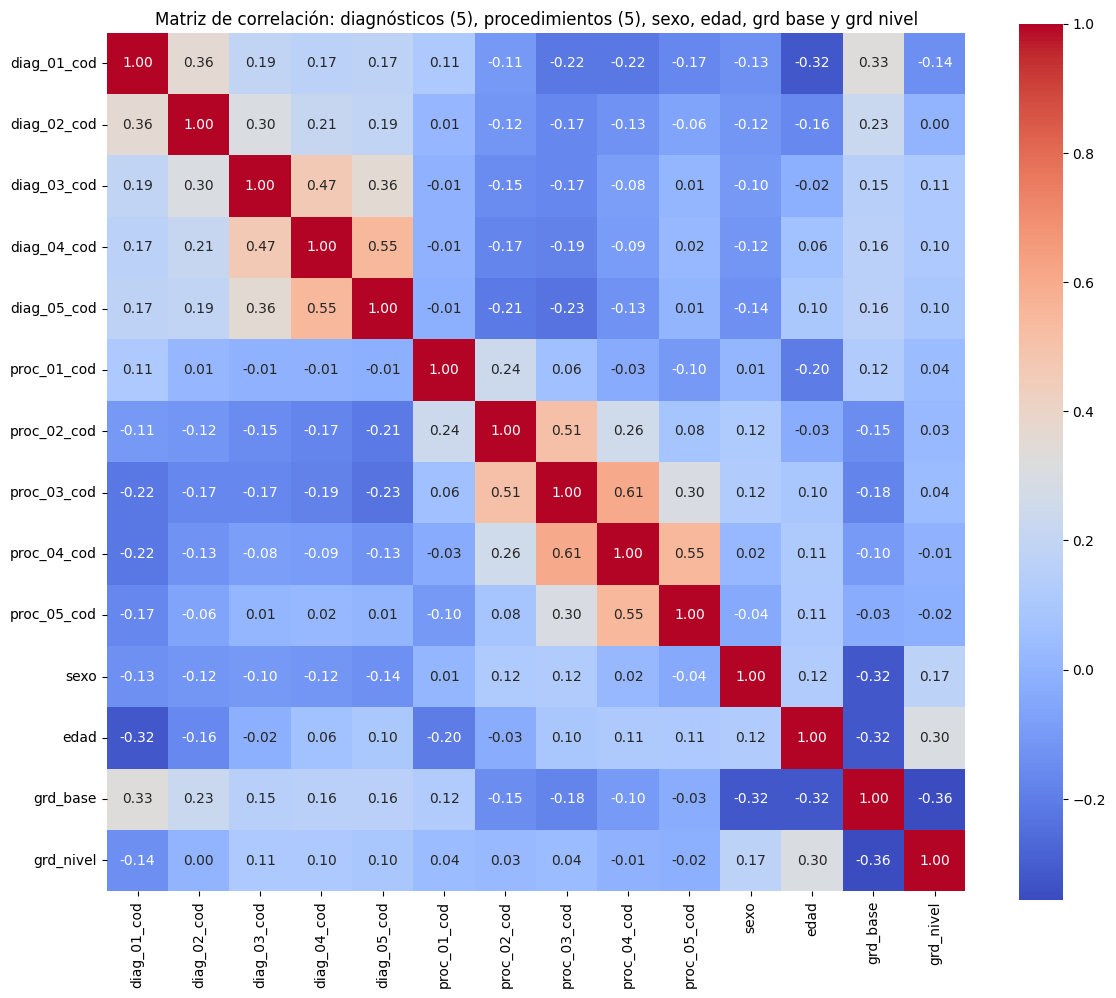

In [22]:
# Anális de correlación con Heatmap

# Seleccionar columnas relevantes (sólo 5 primeros diagnósticos y 5 primeros procedimientos)
cols_diag = [f"diag_0{i}_cod" for i in range(1, 6)]
cols_proc = [f"proc_0{i}_cod" for i in range(1, 6)]
cols_extra = ['sexo', 'edad', 'grd_base', 'grd_nivel']
columnas = cols_diag + cols_proc + cols_extra

# Crear copia del DataFrame con esas columnas
df_corr = df3[columnas].copy()

# Convertir variables categóricas a códigos numéricos
for col in df_corr.columns:
    if df_corr[col].dtype == "object":
        df_corr[col] = df_corr[col].astype("category").cat.codes

# Calcular la matriz de correlación
matriz_corr = df_corr.corr()

# Graficar heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación: diagnósticos (5), procedimientos (5), sexo, edad, grd base y grd nivel")
plt.tight_layout()
plt.show()

In [23]:
# Preparación de los datos

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print(f"Cantidad total de datos: {df3.shape}")

# Selección de columnas de entrada
diag_cols = [col for col in df3.columns if col.startswith('diag_') and col.endswith('_cod')]
proc_cols = [col for col in df3.columns if col.startswith('proc_') and col.endswith('_cod')]
input_cols = diag_cols + proc_cols + ['sexo', 'edad']

# Filtramos y limpiamos
df_model = df3[input_cols + ['grd_base']].copy()

print(f"Cantidad total de datos para el modelo: {df_model.shape}")

# Codificamos variables categóricas de entrada
encoders = {}
for col in diag_cols + proc_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    encoders[col] = le

# Codificar variable de salida (grd_base)
le_y = LabelEncoder()
df_model['grd_base'] = le_y.fit_transform(df_model['grd_base'])

# Separar entrada y salida
X = df_model[input_cols]
y = df_model['grd_base']

# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.head()


Cantidad total de datos: (14561, 70)
Cantidad total de datos para el modelo: (14561, 68)


,diag_01_cod,diag_02_cod,diag_03_cod,diag_04_cod,diag_05_cod,diag_06_cod,diag_07_cod,diag_08_cod,diag_09_cod,diag_10_cod,diag_11_cod,diag_12_cod,diag_13_cod,diag_14_cod,diag_15_cod,diag_16_cod,diag_17_cod,diag_18_cod,diag_19_cod,diag_20_cod,diag_21_cod,diag_22_cod,diag_23_cod,diag_24_cod,diag_25_cod,diag_26_cod,diag_27_cod,diag_28_cod,diag_29_cod,diag_30_cod,diag_31_cod,diag_32_cod,diag_33_cod,diag_34_cod,diag_35_cod,proc_01_cod,proc_02_cod,proc_03_cod,proc_04_cod,proc_05_cod,proc_06_cod,proc_07_cod,proc_08_cod,proc_09_cod,proc_10_cod,proc_11_cod,proc_12_cod,proc_13_cod,proc_14_cod,proc_15_cod,proc_16_cod,proc_17_cod,proc_18_cod,proc_19_cod,proc_20_cod,proc_21_cod,proc_22_cod,proc_23_cod,proc_24_cod,proc_25_cod,proc_26_cod,proc_27_cod,proc_28_cod,proc_29_cod,proc_30_cod,sexo,edad
10492,788,816,1461,1293,1094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,515,478,372,192,151,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
287,1450,527,1032,905,814,347,436,613,539,250,180,181,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,409,395,256,178,156,182,164,198,190,177,178,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,79
6496,1046,979,818,747,694,584,503,628,549,499,466,420,408,312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,338,281,10,9,78,141,121,192,193,179,160,67,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33
2313,893,1038,902,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,314,370,285,187,238,233,103,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
14281,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,478,372,267,198,171,148,144,132,117,110,118,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25


In [24]:
# En esta etapa construimos el modelo

import keras_tuner
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model

def build_model(hp):
    inputs = []
    embeddings = []

    for col in diag_cols + proc_cols:
        vocab_size = df_model[col].nunique() + 1
        input_i = Input(shape=(1,), name=col)
        embed_dim = hp.Choice(f"{col}_dim", [4, 8, 16])  # tamaño embedding
        embed_i = Embedding(input_dim=vocab_size, output_dim=embed_dim)(input_i)
        embed_i = Flatten()(embed_i)
        inputs.append(input_i)
        embeddings.append(embed_i)

    # Entradas numéricas directas
    input_sexo = Input(shape=(1,), name='sexo')
    input_edad = Input(shape=(1,), name='edad')
    inputs.extend([input_sexo, input_edad])
    embeddings.extend([input_sexo, input_edad])

    # Red oculta con hiperparámetros
    x = Concatenate()(embeddings)
    x = Dense(hp.Int("units_1", 64, 256, step=64), activation='relu')(x)
    x = Dense(hp.Int("units_2", 32, 128, step=32), activation='relu')(x)
    output = Dense(len(le_y.classes_), activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=2, restore_best_weights=True)

X_train_dict = {col: X_train[col].values for col in X_train.columns}
X_val_dict = {col: X_val[col].values for col in X_val.columns}

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective=keras_tuner.Objective("val_accuracy", direction="max"),
    max_trials=8,
    executions_per_trial=1,
    overwrite=True,
    directory="modelos_os2",
    project_name="rendimiento"
)

tuner.search(X_train_dict, y_train, epochs=8, validation_data=(X_val_dict, y_val),callbacks=[early_stop])



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
8                 |8                 |diag_01_cod_dim
8                 |8                 |diag_02_cod_dim
16                |16                |diag_03_cod_dim
16                |16                |diag_04_cod_dim
8                 |8                 |diag_05_cod_dim
16                |16                |diag_06_cod_dim
16                |16                |diag_07_cod_dim
8                 |8                 |diag_08_cod_dim
4                 |4                 |diag_09_cod_dim
4                 |4                 |diag_10_cod_dim
16                |16                |diag_11_cod_dim
8                 |8                 |diag_12_cod_dim
16                |16                |diag_13_cod_dim
16                |16                |diag_14_cod_dim
16                |16                |diag_15_cod_dim
8                 |8                 |diag_16_cod_dim
8                 |8                 |diag_17_cod_dim
16

KeyboardInterrupt: 

In [26]:
from tensorflow import keras

#mejor_modelo=tuner.get_best_models()[0]
mejor_modelo = keras.models.load_model("mi_mejor_modelo.keras")
mejor_modelo.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ diag_01_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_02_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_03_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_04_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_05_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_06_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_07_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_08_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_09_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_10_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_11_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_12_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_13_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_14_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_15_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_16_cod         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diag_17_cod         │ (None, 1)         │          0 │ -               

 Total params: 1,259,780 (4.81 MB)

 Trainable params: 419,926 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 839,854 (3.20 MB)

In [ ]:
mejor_modelo.save("mi_mejor_modelo.keras")

In [ ]:
from google.colab import files

# Descargar el archivo
files.download('mi_mejor_modelo.keras')

In [27]:
# Realizar la predicción
X_train_dict = {col: X_train[col].values for col in X_train.columns}
X_val_dict = {col: X_val[col].values for col in X_val.columns}

y_pred_probs = mejor_modelo.predict(X_val_dict)

y_pred_probs

92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step


array([[3.51036711e-08, 2.01591307e-21, 5.15017869e-18, ...,
        1.67502394e-12, 1.00572999e-14, 1.22736150e-08],
       [9.37728504e-18, 3.03759668e-25, 4.46896616e-15, ...,
        3.11167995e-20, 1.61795353e-15, 1.15015890e-21],
       [1.49837510e-12, 3.89204918e-10, 1.50072935e-06, ...,
        9.12953185e-11, 1.88743048e-08, 3.02566586e-05],
       ...,
       [1.28301221e-03, 1.85267963e-02, 5.39610977e-04, ...,
        5.67462266e-05, 7.59847467e-07, 1.55698939e-03],
       [5.85257621e-05, 1.16035447e-03, 1.28362200e-03, ...,
        1.28872318e-06, 1.55330417e-06, 3.38602391e-08],
       [3.84549207e-12, 1.60892348e-20, 5.42689842e-14, ...,
        3.36375520e-14, 1.16947895e-07, 1.37191911e-08]], dtype=float32)

In [30]:
y_pred_probs[0:1]

array([[3.51036711e-08, 2.01591307e-21, 5.15017869e-18, 2.76766957e-27,
        1.78684641e-27, 4.06552612e-18, 6.16880569e-32, 1.07564383e-17,
        5.75341727e-20, 3.01635588e-13, 3.70740034e-17, 1.09403477e-16,
        1.06526766e-25, 7.11762270e-28, 1.84615848e-25, 3.92003833e-14,
        3.68811777e-17, 2.07696821e-24, 7.43092657e-18, 2.46498210e-18,
        1.50424697e-17, 3.96959243e-10, 1.88072162e-11, 4.77149050e-23,
        1.74412997e-19, 2.76264935e-19, 2.78481936e-13, 1.60635960e-16,
        3.14512276e-24, 1.23634211e-11, 6.70786449e-08, 2.72796569e-07,
        3.99951539e-09, 1.19890658e-16, 3.58439753e-16, 1.10304920e-30,
        8.49985176e-13, 2.31691867e-17, 1.12704324e-14, 7.52826028e-15,
        6.61200536e-17, 9.49535700e-24, 1.04120594e-18, 2.91966971e-12,
        2.96718330e-18, 5.11374677e-18, 4.70834745e-17, 6.82355710e-25,
        1.86591353e-16, 4.47801485e-09, 1.85847046e-22, 1.11112600e-19,
        1.89708552e-22, 7.46765470e-22, 1.76829522e-18, 7.551922

In [32]:
y_val[0:1]

,grd_base
3836,144


In [34]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [28]:
# Aqui va la evaluacion del modelo

# Evaluación en datos de validación
loss, acc = mejor_modelo.evaluate(X_val_dict, y_val)
print(f"Precisión en validación: {acc:.2f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8601 - loss: 0.7516
Precisión en validación: 0.85


In [38]:
# Obtener clases predichas
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_pred_classes

array([144, 159, 189, ..., 109,  47, 152])

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy general
acc = accuracy_score(y_val, y_pred_classes)

# Precision, recall, f1: puedes usar average='macro', 'micro', 'weighted'
precision = precision_score(y_val, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_val, y_pred_classes, average='weighted', zero_division=0)
f1 = f1_score(y_val, y_pred_classes, average='weighted', zero_division=0)

# Matriz de confusión
cm = confusion_matrix(y_val, y_pred_classes)

print(f"Accuracy: {acc:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")


Accuracy: 0.8510
Precision (weighted): 0.8738
Recall (weighted): 0.8510
F1-score (weighted): 0.8533


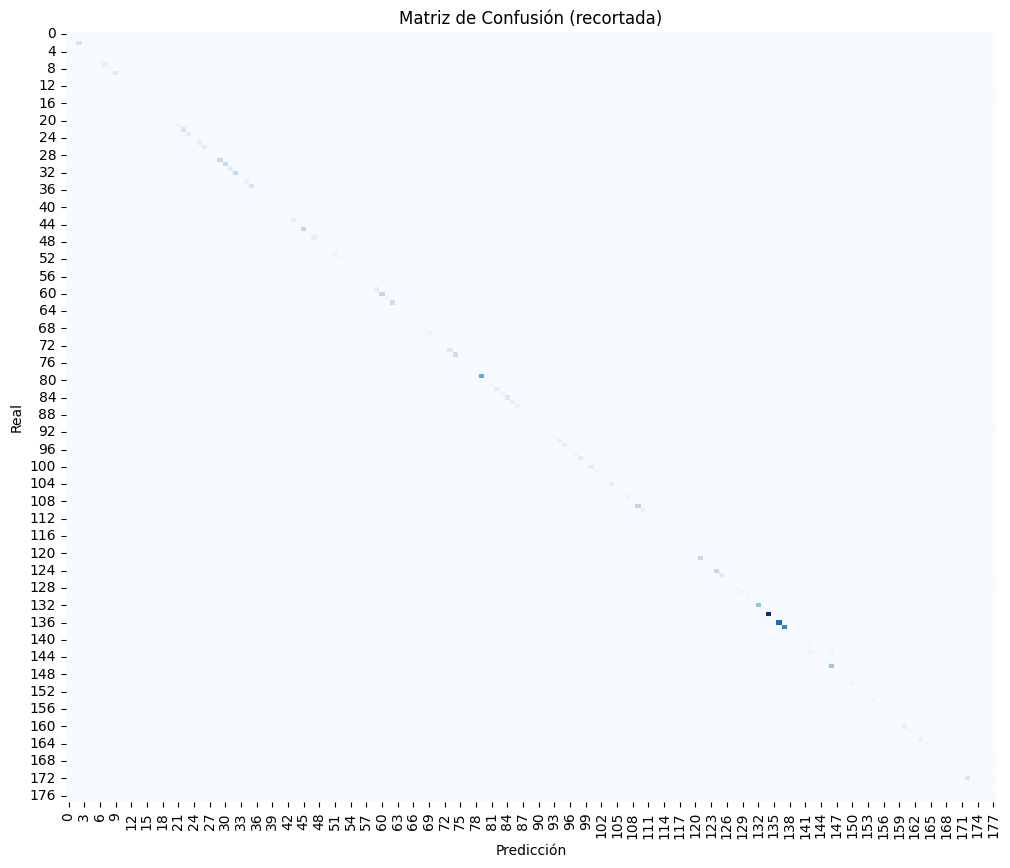

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap='Blues', cbar=False)
plt.title("Matriz de Confusión (recortada)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [42]:
import pandas as pd

# Contar frecuencia de clases en y_val
top_classes = pd.Series(y_val).value_counts().head(5).index.tolist()

# Mostrar las clases más frecuentes con sus nombres reales
print("Top 5 clases más frecuentes:")
for i, cls in enumerate(top_classes):
    print(f"{i+1}. Clase codificada: {cls} — Nombre real: {le_y.inverse_transform([cls])[0]}")


Top 5 clases más frecuentes:
1. Clase codificada: 157 — Nombre real: 14610
2. Clase codificada: 159 — Nombre real: 14612
3. Clase codificada: 160 — Nombre real: 14613
4. Clase codificada: 88 — Nombre real: 07114
5. Clase codificada: 170 — Nombre real: 15817


In [44]:
!pip install ace_tools

In [52]:
from sklearn.metrics import classification_report

# Reporte completo
report = classification_report(y_val, y_pred_classes, labels=top_classes, target_names=le_y.inverse_transform(top_classes), output_dict=True)

# Convertir a DataFrame
df_report = pd.DataFrame(report).transpose()

# Filtrar solo top 5
df_top5 = df_report.loc[le_y.inverse_transform(top_classes)]

import numpy as np
df_top5["support"] = df_top5["support"].astype(int)
df_top5 = df_top5[["precision", "recall", "f1-score", "support"]].round(3)

df_top5


,precision,recall,f1-score,support
14610,0.996,1.000,0.998,225
14612,0.961,0.994,0.977,173
14613,0.967,1.000,0.983,148
07114,0.960,0.975,0.967,122
15817,0.744,0.879,0.806,99


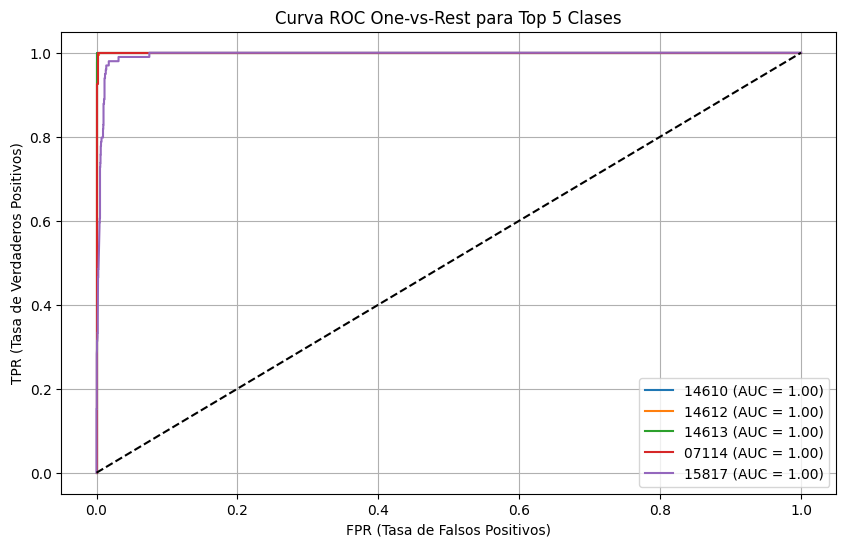

In [47]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarizar los verdaderos y predichos (solo top 5)
y_val_bin = label_binarize(y_val, classes=range(len(le_y.classes_)))
n_classes = len(le_y.classes_)

plt.figure(figsize=(10, 6))

for cls in top_classes:
    fpr, tpr, _ = roc_curve(y_val_bin[:, cls], y_pred_probs[:, cls])
    roc_auc = auc(fpr, tpr)
    label_name = le_y.inverse_transform([cls])[0]
    plt.plot(fpr, tpr, label=f'{label_name} (AUC = {roc_auc:.2f})')

# Diagonal
plt.plot([0, 1], [0, 1], 'k--')

plt.title("Curva ROC One-vs-Rest para Top 5 Clases")
plt.xlabel("FPR (Tasa de Falsos Positivos)")
plt.ylabel("TPR (Tasa de Verdaderos Positivos)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [49]:
# Usar solo top 5 clases que sí están presentes
top_classes = pd.Series(y_val).value_counts().head(5).index.tolist()

# Binarizar solo estas
from sklearn.preprocessing import label_binarize

y_val_bin_top = label_binarize(y_val, classes=range(len(le_y.classes_)))[:, top_classes]
y_pred_probs_top = y_pred_probs[:, top_classes]

roc_auc_top5 = roc_auc_score(y_val_bin_top, y_pred_probs_top, average='macro', multi_class='ovr')
print(f"ROC AUC (top 5 clases): {roc_auc_top5:.4f}")


ROC AUC (top 5 clases): 0.9989


In [50]:
import numpy as np

# Clases presentes en y_val
present_classes = np.unique(y_val)

# Filtrar y_val_bin y y_pred_probs para esas clases
y_val_bin_filtered = y_val_bin[:, present_classes]
y_pred_probs_filtered = y_pred_probs[:, present_classes]

roc_auc = roc_auc_score(
    y_val_bin_filtered,
    y_pred_probs_filtered,
    average='macro',
    multi_class='ovr'
)
print(f"ROC AUC score (macro, filtered): {roc_auc:.4f}")


ROC AUC score (macro, filtered): 0.9810
